In [ ]:
pip install scikit-surprise

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

{'R-squared': 0.9525825888348498}


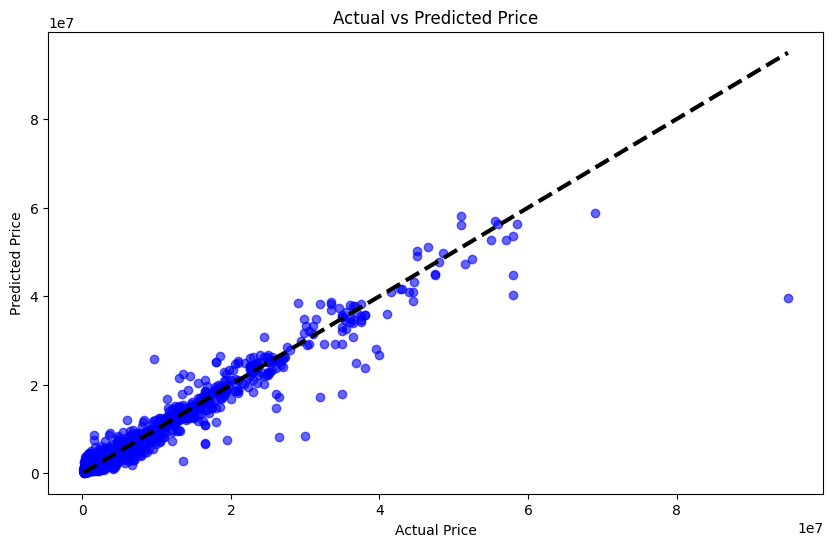

R-squared: 0.9525825888348498


In [2]:
# dataset
df = pd.read_csv('/content/car_data.csv')

# Removes rows where 'Price' is not a numeric value
df = df[pd.to_numeric(df['Price'], errors='coerce').notnull()]

# Converts 'Price' to float using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Price'] = df['Price'].astype(float)

# Handle missing values
numerical_features = ['Make_Year', 'CC', 'Mileage']
categorical_features = ['Make', 'Model', 'Assembly', 'Registered City', 'Transmission']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X = df.drop(['Price', 'Version'], axis=1)
y = df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Normalization
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

# Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_orig_scale = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test_orig_scale = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Evaluation
mse = mean_squared_error(y_test_orig_scale, y_pred_orig_scale)
r2 = r2_score(y_test_orig_scale, y_pred_orig_scale)

results = {

    'R-squared': r2
}

print(results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig_scale, y_pred_orig_scale, alpha=0.6, color='b')
plt.plot([y_test_orig_scale.min(), y_test_orig_scale.max()],
         [y_test_orig_scale.min(), y_test_orig_scale.max()], 'k--', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


print(f"R-squared: {r2}")





#### Movie Recommendation system

In [3]:
movies_df = pd.read_csv('/content/movies_dataset.csv')

# Drops rows with missing values
movies_df.dropna(inplace=True)


X = movies_df.drop(columns=['title'])
y = movies_df['title']


model = NearestNeighbors(n_neighbors=5, algorithm='auto')
model.fit(X)


def recommend_movie(input_movie):

    input_index = movies_df.index[movies_df['title'] == input_movie].tolist()[0]
    distances, indices = model.kneighbors(X.iloc[input_index].values.reshape(1, -1))
    recommended_movies = []
    for index in indices.flatten():
        if index != input_index:
            recommended_movies.append(y[index])

    return recommended_movies


input_movie = "Air Force One (1997)"
recommended_movies = recommend_movie(input_movie)
print("Recommended movie(s) based on", input_movie, ":", recommended_movies)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Recommended movie(s) based on Air Force One (1997) : ['Wild Wild West (1999)', 'Con Air (1997)', 'Lost World: Jurassic Park, The (1997)', 'Mask of Zorro, The (1998)']
